# 用sktime內建的時間序列資料airline(共144筆)進行各項分析
### 首先先觀察一下這筆資料 :

In [1]:
from sktime.datasets import load_airline
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.all import *
import matplotlib as plt
%matplotlib inline

load_airline()


Bad key savefig.frameon in file C:\Users\user\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\user\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\user\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably need to get an updated matplotlibrc file f

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Freq: M, Name: Number of airline passengers, Length: 144, dtype: float64

### 將其分為train(訓練集),test(測試集)並畫成時間序列圖 :

C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

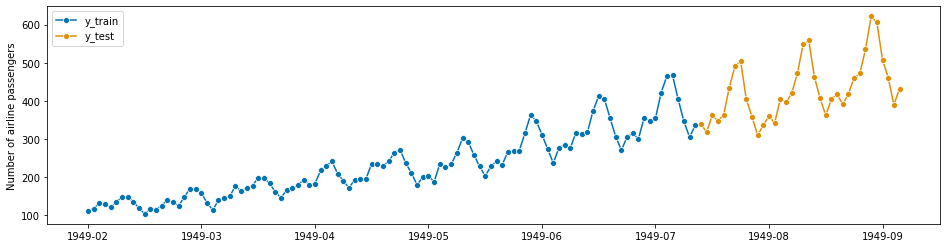

In [3]:
y = load_airline()
y_train, y_test = temporal_train_test_split(y)
plot_series(y_train, y_test, labels=["y_train", "y_test"])

### 用NaiveForecaster進行最基本的預測( 方法有三 : mean , last , drift ) :

C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\user\Anaconda3\lib\

0.23195770387951434

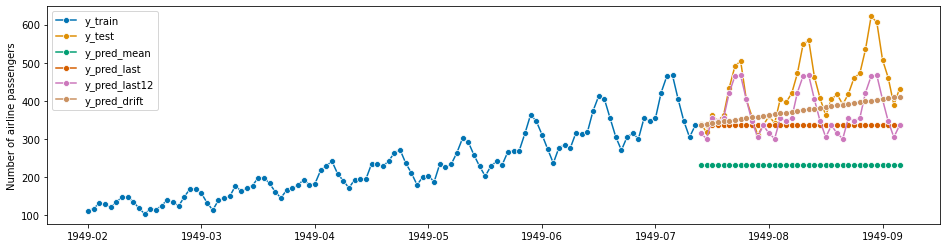

In [4]:
from sktime.forecasting.naive import NaiveForecaster

import numpy as np
fh = np.arange(1, len(y_test) + 1)

naive_forecaster_mean = NaiveForecaster(strategy="mean")
naive_forecaster_mean.fit(y_train)
y_mean = naive_forecaster_mean.predict(fh)

naive_forecaster_last = NaiveForecaster(strategy="last")
naive_forecaster_last.fit(y_train)
y_last = naive_forecaster_last.predict(fh)

naive_forecaster_last12 = NaiveForecaster(strategy="last", sp=12)
naive_forecaster_last12.fit(y_train)
y_last12 = naive_forecaster_last12.predict(fh)

naive_forecaster_drift = NaiveForecaster(strategy="drift")
naive_forecaster_drift.fit(y_train)
y_drift = naive_forecaster_drift.predict(fh)

plot_series(y_train, y_test, y_mean, y_last, y_last12, y_drift , labels=["y_train", "y_test" ,"y_pred_mean","y_pred_last" ,"y_pred_last12","y_pred_drift"]);
smape_loss(y_last, y_test)

### 用ReducedRegressionForecaster進行預測 :

C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.1261939950148572

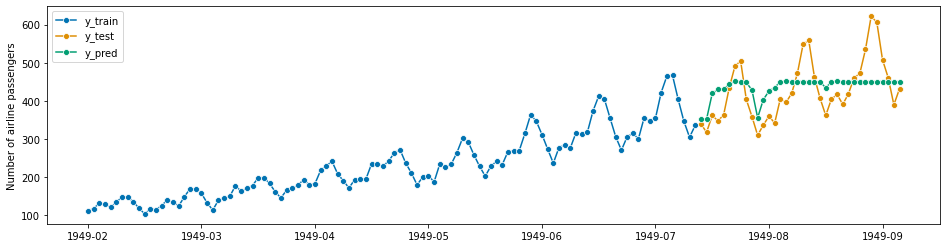

In [5]:
from sktime.forecasting.compose import ReducedRegressionForecaster
from sklearn.ensemble import RandomForestRegressor
from sktime.performance_metrics.forecasting import smape_loss

regressor = RandomForestRegressor()
forecaster = ReducedRegressionForecaster(regressor, window_length=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)

plot_series(y_train, y_test, y_pred, labels=['y_train', 'y_test', 'y_pred'])
smape_loss(y_test, y_pred)

### 用ARIMA對時間資料配適模型 :

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\user\Anaconda3\lib\site-p

0.04117062369188669

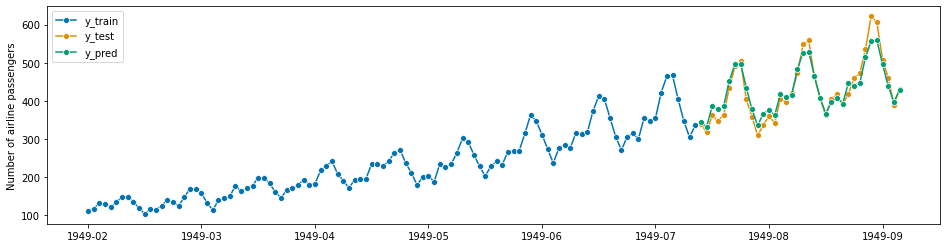

In [6]:
from sktime.forecasting.arima import AutoARIMA

forecaster = AutoARIMA(sp=12)
forecaster.fit(y_train)

y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

### 用KNeighborsRegressor進行預測 :

C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.14008272913734346

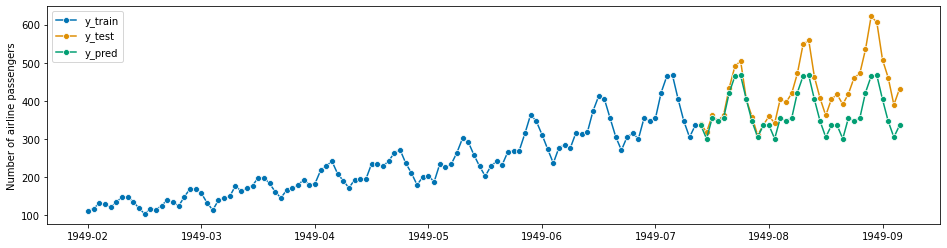

In [7]:
from sklearn.neighbors import KNeighborsRegressor

y = load_airline()
y_train, y_test = temporal_train_test_split(y, test_size=36)
regressor = KNeighborsRegressor(n_neighbors=1)
forecaster = ReducedRegressionForecaster(regressor=regressor, window_length=12, strategy="recursive")
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

### 用ExponentialSmoothing進行預測 :

C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.05115475921211792

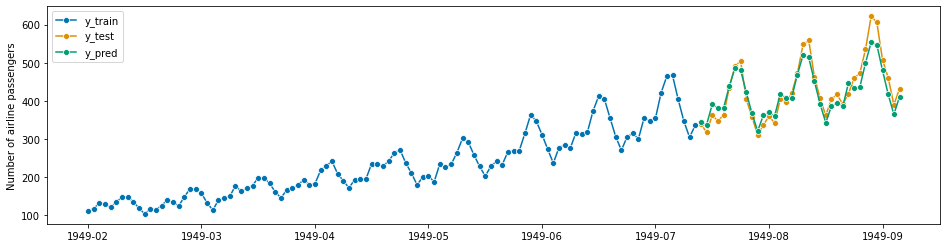

In [8]:
forecaster = ExponentialSmoothing(trend="add", seasonal="multiplicative", sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

### 用sklearn的模型GridSearchCV去進行預測 :

C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.12482061139460401

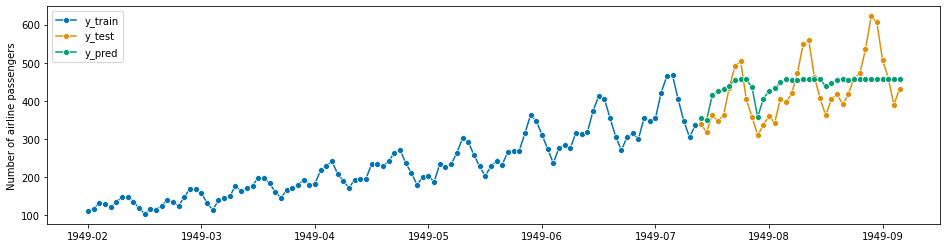

In [9]:
from sklearn.model_selection import GridSearchCV

# tuning the 'n_estimator' hyperparameter of RandomForestRegressor from scikit-learn
regressor_param_grid = {"n_estimators": [100, 200, 300]}
forecaster_param_grid = {"window_length": [5,10,15,20,25]}

# create a tunnable regressor with GridSearchCV
regressor = GridSearchCV(RandomForestRegressor(), param_grid=regressor_param_grid)
forecaster = ReducedRegressionForecaster(regressor, window_length=15, strategy="recursive")

cv = SlidingWindowSplitter(initial_window=int(len(y_train) * 0.5))
gscv = ForecastingGridSearchCV(forecaster, cv=cv, param_grid=forecaster_param_grid)

gscv.fit(y_train)
y_pred = gscv.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);
smape_loss(y_test, y_pred)

### 在時間序列圖中加上預測信心區間 :

C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


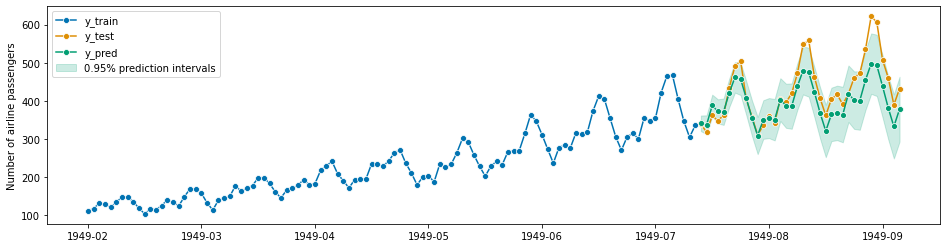

In [10]:
forecaster = ThetaForecaster(sp=12)
forecaster.fit(y_train)
alpha = 0.05  # 95% prediction intervals
y_pred, pred_ints = forecaster.predict(fh, return_pred_int=True, alpha=alpha)

fig, ax = plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
ax.fill_between(ax.get_lines()[-1].get_xdata(), pred_ints["lower"], pred_ints["upper"],
                alpha=0.2, color=ax.get_lines()[-1].get_c(), label=f"{1 - alpha}% prediction intervals")
ax.legend();

# 時間序列資料分類
### 用資料arrow head進行分析  :

### 首先將資料分為train(訓練集),test(測試集)

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sktime.classification.compose import TimeSeriesForestClassifier
from sktime.datasets import load_arrow_head
from sktime.series_as_features.compose import FeatureUnion
from sktime.transformers.series_as_features.compose import RowTransformer
from sktime.transformers.series_as_features.segment import \
    RandomIntervalSegmenter
from sktime.utils.time_series import time_series_slope
from sktime.utils import all_estimators
from sktime.transformers.series_as_features.reduce import Tabularizer
from sktime.transformers.series_as_features.summarize import TSFreshFeatureExtractor, RandomIntervalFeatureExtractor
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier

X, y = load_arrow_head(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(158, 1) (158,) (53, 1) (53,)


### X為時間序列資料、y為類別

In [13]:
X_train.head()

,dim_0
121,0 -1.9586 1 -1.9371 2 -1.8798 3 ...
34,0 -2.0417 1 -2.0572 2 -2.0522 3 ...
16,0 -2.0537 1 -2.0369 2 -2.0330 3 ...
52,0 -1.9858 1 -1.9843 2 -1.9625 3 ...
16,0 -0.79626 1 -0.77368 2 -0.66440 3...


In [14]:
y_train.head()

121    1
34     0
16     1
52     0
16     0
dtype: object

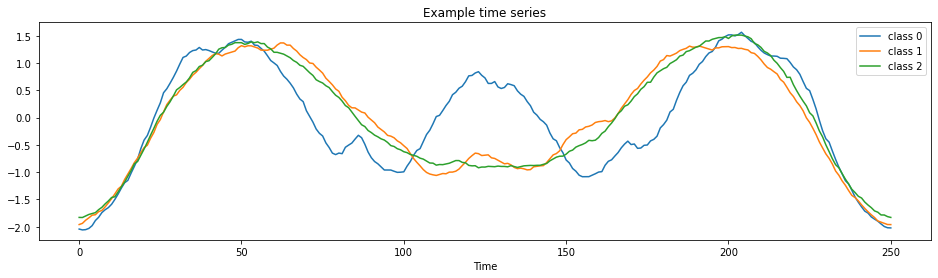

In [15]:
labels, counts = np.unique(y_train, return_counts=True)
fig, ax = plt.subplots(1, figsize=plt.figaspect(.25))
for label in labels:
    X_train.loc[y_train == label, "dim_0"].iloc[0].plot(ax=ax, label=f"class {label}")
plt.legend()
ax.set(title="Example time series", xlabel="Time");

## 特徵選取
### TSFreshFeatureExtractor可自動算出時間序列資料的基本統計量作為特徵

In [16]:
transformer = TSFreshFeatureExtractor()
extracted_features = transformer.fit_transform(X_train)
extracted_features.head()

C:\Users\user\Anaconda3\lib\site-packages\sktime\transformers\series_as_features\summarize\_tsfresh.py:163: UserWarning: Found non-unique index, replaced with unique index.
  warn("Found non-unique index, replaced with unique index.")
Feature Extraction: 100%|████████████████████████| 5/5 [00:12<00:00,  2.44s/it]


,dim_0__variance_larger_than_standard_deviation,dim_0__has_duplicate_max,dim_0__has_duplicate_min,dim_0__has_duplicate,dim_0__sum_values,dim_0__abs_energy,dim_0__mean_abs_change,dim_0__mean_change,dim_0__mean_second_derivative_central,dim_0__median,...,dim_0__fourier_entropy__bins_2,dim_0__fourier_entropy__bins_3,dim_0__fourier_entropy__bins_5,dim_0__fourier_entropy__bins_10,dim_0__fourier_entropy__bins_100,dim_0__permutation_entropy__dimension_3__tau_1,dim_0__permutation_entropy__dimension_4__tau_1,dim_0__permutation_entropy__dimension_5__tau_1,dim_0__permutation_entropy__dimension_6__tau_1,dim_0__permutation_entropy__dimension_7__tau_1
0,0.0,0.0,0.0,1.0,-0.000146,249.998674,0.329658,0.005986,-0.000116,-0.045353,...,0.081510,0.081510,0.092513,0.204643,1.168808,1.507819,2.312261,3.008950,3.537296,3.964699
1,0.0,0.0,0.0,1.0,-0.000034,249.998998,0.357999,0.004165,0.000037,0.018880,...,0.046288,0.092513,0.127671,0.184769,1.125211,1.443730,2.181757,2.836204,3.301149,3.678335
2,0.0,1.0,0.0,1.0,-0.000183,250.000758,0.324536,0.007751,-0.000059,0.387030,...,0.046288,0.046288,0.186791,0.250609,1.300806,1.550857,2.469649,3.312659,3.934065,4.311762
3,0.0,0.0,0.0,1.0,-0.000311,249.999929,0.353419,0.006184,-0.000181,0.088417,...,0.081510,0.081510,0.138673,0.219798,1.315358,1.428790,2.202412,2.898770,3.486940,3.959659
4,0.0,0.0,0.0,1.0,0.000194,250.000369,0.249255,-0.000644,-0.000395,-0.170860,...,0.046288,0.092513,0.127671,0.138673,0.396094,1.411846,2.166560,2.821565,3.376408,3.828745


### 使用RandomIntervalFeatureExtractor選出特定特徵

In [17]:
features = [np.mean, np.std, time_series_slope]
transformer = RandomIntervalFeatureExtractor(features=features)
extracted_features = transformer.fit_transform(X_train)
extracted_features.head()

,['col0']_89_93_mean,['col0']_174_181_mean,['col0']_1_125_mean,['col0']_76_126_mean,['col0']_21_74_mean,['col0']_144_242_mean,['col0']_12_67_mean,['col0']_166_207_mean,['col0']_115_154_mean,['col0']_14_148_mean,...,['col0']_144_242_time_series_slope,['col0']_12_67_time_series_slope,['col0']_166_207_time_series_slope,['col0']_115_154_time_series_slope,['col0']_14_148_time_series_slope,['col0']_74_121_time_series_slope,['col0']_159_195_time_series_slope,['col0']_227_249_time_series_slope,['col0']_14_212_time_series_slope,['col0']_12_60_time_series_slope
0,-0.076758,0.878636,0.025403,-0.405751,0.909668,0.323028,0.588000,1.016189,-0.759484,0.039780,...,-0.003229,0.048183,0.026510,0.008271,-0.013578,-0.042448,0.048455,-0.077837,0.001086,0.057171
1,-0.754437,-0.356469,0.013639,-0.282480,0.865005,0.096234,0.658904,0.479206,0.220643,0.231921,...,0.009975,0.038514,0.066859,-0.042427,-0.004124,0.022234,0.062122,-0.101103,-0.000133,0.055727
2,0.372315,0.970849,0.019893,-0.289966,0.769848,0.414261,0.485655,0.923954,-1.064532,-0.010425,...,-0.004854,0.035448,0.000594,0.034569,-0.015658,-0.062512,0.014091,-0.108180,0.000373,0.042826
3,0.352675,0.752466,0.043041,-0.234950,0.860312,0.306575,0.555970,0.978881,-0.821964,0.059136,...,0.000485,0.052386,0.027094,0.001589,-0.012401,-0.036303,0.039723,-0.083450,0.001102,0.066766
4,-0.003064,-1.597757,-0.234030,-0.474291,0.013256,0.120303,-0.202509,-0.333716,0.810460,0.073674,...,0.007715,0.021802,0.092992,0.076158,0.007734,-0.068065,0.053770,-0.063235,0.002018,0.012031


## sktime分類器
### 用TimeSeriesForestClassifier進行分類

In [18]:
classifier = TimeSeriesForestClassifier(
    n_estimators = 500,
    criterion = "entropy",
    max_depth = 5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.9622641509433962

In [19]:
features = [np.mean, np.std, time_series_slope]
steps = [('transform', RandomIntervalFeatureExtractor(features=features)),
         ('clf', DecisionTreeClassifier())]
estimator = Pipeline(steps)
classifier = TimeSeriesForestClassifier(estimator = estimator)
classifier.fit(X_train, y_train)
classifier.score(X_train, y_train)

1.0

In [20]:
classifier = make_pipeline(
    TSFreshFeatureExtractor(default_fc_parameters="efficient", show_warnings=False),
    RandomForestClassifier(),
)
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

C:\Users\user\Anaconda3\lib\site-packages\sktime\transformers\series_as_features\summarize\_tsfresh.py:163: UserWarning: Found non-unique index, replaced with unique index.
  warn("Found non-unique index, replaced with unique index.")
Feature Extraction: 100%|████████████████████████| 5/5 [00:11<00:00,  2.40s/it]
C:\Users\user\Anaconda3\lib\site-packages\sktime\transformers\series_as_features\summarize\_tsfresh.py:163: UserWarning: Found non-unique index, replaced with unique index.
  warn("Found non-unique index, replaced with unique index.")
Feature Extraction: 100%|████████████████████████| 5/5 [00:04<00:00,  1.07it/s]


0.9245283018867925

### 用KNeighborsTimeSeriesClassifier進行分類

In [21]:
classifier = KNeighborsTimeSeriesClassifier(n_neighbors = 5, metric="dtw")
classifier.fit(X_train, y_train)
classifier.score(X_train, y_train)

0.9177215189873418

### Other classifiers

In [ ]:
from sktime.utils import all_estimators
all_estimators(estimator_type="classifier")